# Sheet 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# test code square
A = np.array([[1,1,1],[2,2,2]])
sizeA = np.shape(A)
print(A)
b = np.sum(A,axis=1)
print(b)
#print(np.ones((2,1))@np.ones((1,3)))
#print(np.matmul(np.ones(2).T@np.ones((1,3))))
X = A-np.outer(np.sum(A,axis=1)/sizeA[1],np.ones((sizeA[1])))

#print(np.linalg.eig(X@X.T))
idx = np.argsort(b)[::-1]

b = b[idx]
print(b)

[[1 1 1]
 [2 2 2]]
[3 6]
[6 3]


## 1 Principal Component Analysis
### (a)

In [3]:
# TODO: implement PCA (fill in the blanks in the function below)

def pca(data, n_components=None,pc=False):
    """
    Principal Component Analysis on a p x N data matrix.
    
    Parameters
    ----------
    data : np.ndarray
        Data matrix of shape (p, N).
    n_components : int, optional
        Number of requested components. By default returns all components.
        
    Returns
    -------
    np.ndarray, np.ndarray
        the pca components (shape (n_components, p)) and the projection (shape (n_components, N))

    """
    # set n_components to p by default
    n_components = data.shape[0] if n_components is None else n_components
    assert n_components <= data.shape[0], f"Got n_components larger than dimensionality of data!"
    
    # center the data
    dataSize = np.shape(data)
    # sum along the rows
    X = data - np.outer((np.sum(data,axis=1))/dataSize[1],np.ones(dataSize[1]))
    #X = (data.T - np.mean(data,axis=1)).T

    # compute X times X transpose
    XXtrans = X@X.T

    # compute the eigenvectors and eigenvalues
    eigenVals, eigenVec = np.linalg.eig(XXtrans)
    # eigenVals, eigenVec = np.linalg.eigh(XXtrans)

    # sort the eigenvectors by eigenvalue and take the n_components largest ones
    index = np.argsort(eigenVals)[::-1] # sorts index from low to high, then reverses
                     
    eigenVec_sort = eigenVec[:,index]
    # eigenVec_sort = eigenVec[index] wrong 
    
    # n components of the vectors
    components = eigenVec_sort[:n_components]

    # compute X_projected, the projection of the data to the components
    X_projected = components@X

    if pc:
        eigenVals_sort = eigenVals[index]
        return components, X_projected, eigenVals_sort[:n_components]
    
    return components, X_projected  # return the n_components first components and the pca projection of the data


In [4]:
# Example data to test your implementation 
# All the asserts on the bottom should go through if your implementation is correct

data = np.array([
    [ 1,  0,  0, -1,  0,  0],
    [ 0,  3,  0,  0, -3,  0],
    [ 0,  0,  5,  0,  0, -5]
], dtype=np.float32)

# add a random offset to all samples. it should not affect the results
data += np.random.randn(data.shape[0], 1)

n_components = 2
components, projection = pca(data, n_components=n_components)  # apply your implementation

# the correct results are known (up to some signs)
true_components = np.array([[0, 0, 1], [0, 1, 0]], dtype=np.float32)
true_projection = np.array([
    [ 0,  0,  5,  0,  0, -5],
    [ 0,  3,  0,  0, -3,  0]
], dtype=np.float32)

# check that components match, up to sign
assert isinstance(components, np.ndarray), f'Expected components to be numpy array but got {type(components)}'
assert components.shape == true_components.shape, f'{components.shape}!={true_components.shape}'
assert np.allclose(np.abs(components * true_components).sum(1), np.ones(n_components)), f'Components not matching'

# check that projections agree, taking into account potentially flipped components
assert isinstance(projection, np.ndarray), f'Expected projection to be numpy array but got {type(projection)}'
assert projection.shape == (n_components, data.shape[1]), f'Incorrect shape of projection: Expected {(n_components, data.shape[1])}, got {projection.shape}'
assert np.allclose(projection, true_projection * (components * true_components).sum(1, keepdims=True), atol=1e-6), f'Projections not matching'

print('Test successful!')

Test successful!


### (b)

Load the data (it is a subset of the data at https://opendata.cern.ch/record/4910#)

In [5]:
features = np.load('data/dijet_features.npy')
labels = np.load('data/dijet_labels.npy')
label_names = ['b', 'c', 'q']  # bottom, charm or light quarks

print(f'{features.shape=}, {labels.shape=}')  # print the shapes

# TODO: print how many samples of each class are present in the data (hint: numpy.unique)
unique_labels, count = np.unique(labels,return_counts=True,)
for i in range(len(unique_labels)):
    print("label: ",label_names[int(unique_labels[i])]," count: ",count[i])



features.shape=(116, 2233), labels.shape=(2233,)
label:  b  count:  999
label:  c  count:  864
label:  q  count:  370


Normalize the data

In [6]:
# TODO: report range of features and normalize the data to zero mean and unit variance
mean = np.mean(features)
std_dev = np.std(features)

# standard guassian 
Z = (features - mean)/std_dev

# test 
print(f"mean: {np.mean(Z)}, std deviation: {np.std(Z)} ")

mean: 7.987941251653921e-17, std deviation: 1.0 


### (c)
Compute a 2D PCA projection and make a scatterplot of the result, once without color, once coloring the dots by label. Interpret your results.

In [7]:
# TODO: apply PCA as implemented in (a)

#comp, proj = pca(features,2)


comp, proj = pca(features)

/Users/samrouppe/opt/anaconda3/envs/mlph/lib/python3.9/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/samrouppe/opt/anaconda3/envs/mlph/lib/python3.9/site-packages/matplotlib/collections.py:197: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


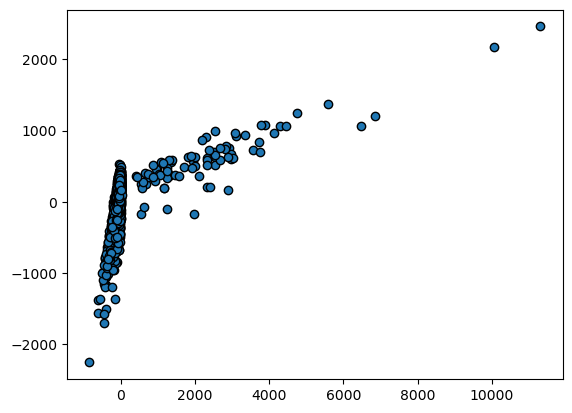

In [8]:
# TODO: make a scatterplot of the PCA projection
plt.scatter(proj[0],proj[1],edgecolors='k')
plt.show()

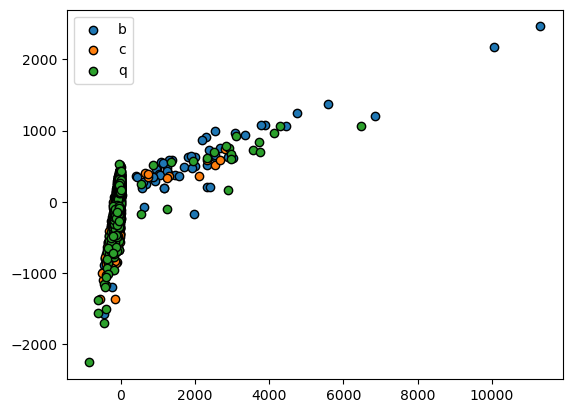

In [9]:
# TODO: make a scatterplot, coloring the dots by their label and including a legend with the label names
# (hint: one way is to call plt.scatter once for each of the three possible labels. Why could it be problematic to scatter the data sorted by labels though?)
labels = labels.astype(int)
for i in range(len(label_names)):
    indices = np.where(labels == i)
    plt.scatter(proj[0,indices],proj[1,indices],label=label_names[i],edgecolors='k')
plt.legend()
plt.show()
    

## 2 Nonlinear Dimension Reduction

In [10]:
import umap  # import umap-learn, see https://umap-learn.readthedocs.io/

In [11]:
# if you have not done 1(b) yet, you can load the normalized features directly:
features = np.load('data/dijet_features_normalized.npy')
labels = np.load('data/dijet_labels.npy')
label_names = ['b', 'c', 'q']  # bottom, charm or light quarks
features.shape

(116, 2233)

### (a)

In [12]:
# TODO: Apply umap on the normalized jet features from excercise 1. It will take a couple of seconds.
# note: umap uses a different convention regarding the feature- and sample dimension, N x p instead of p x N!

reducer = umap.UMAP()

embedding = reducer.fit_transform(features.T)
embedding.shape

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


(2233, 2)

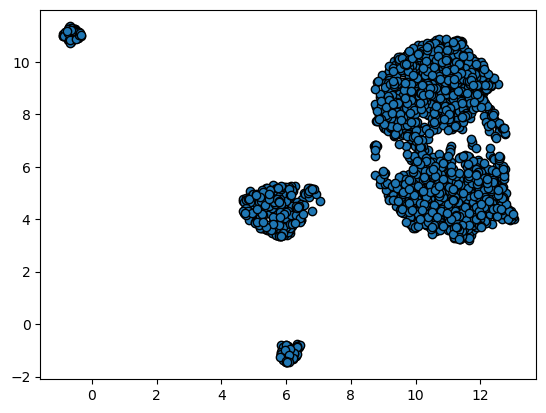

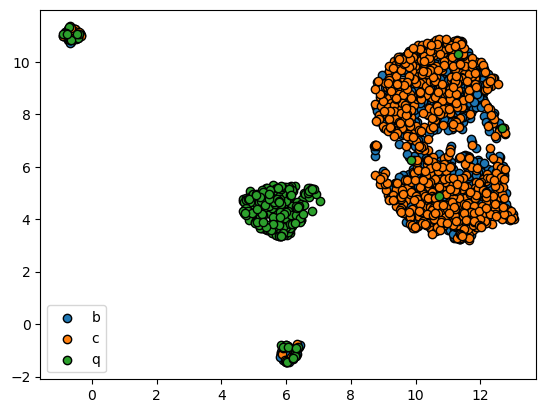

In [13]:
# TODO: make a scatterplot of the UMAP projection
plt.scatter(embedding[:,0],embedding[:,1],edgecolors='k')
plt.show()
# TODO: make a scatterplot, coloring the dots by their label and including a legend with the label names
labels = labels.astype(int)
for i in range(len(label_names)):
    indices = np.where(labels == i)
    plt.scatter(embedding[indices,0],embedding[indices,1],label=label_names[i],edgecolors='k')
plt.legend()
plt.show()

### (b)

/Users/samrouppe/opt/anaconda3/envs/mlph/lib/python3.9/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(


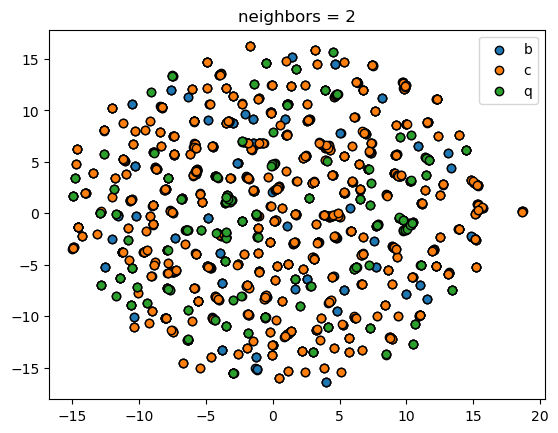

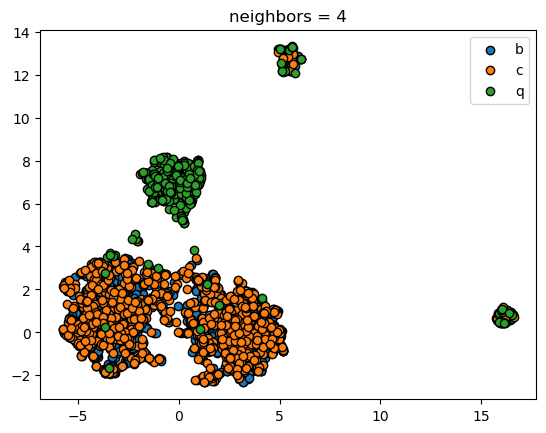

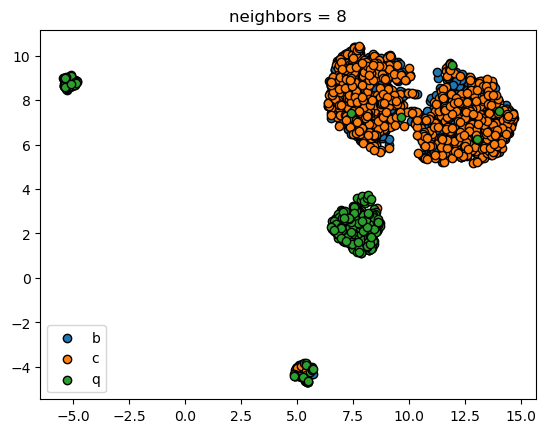

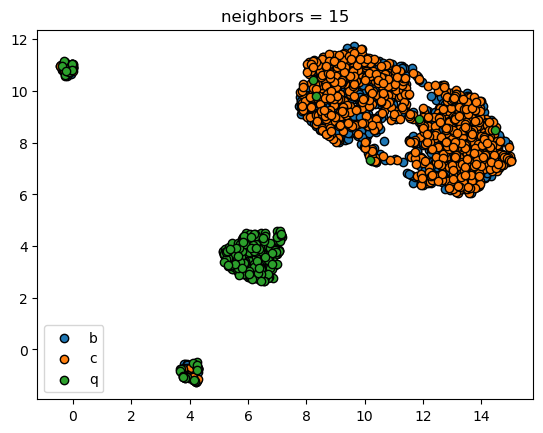

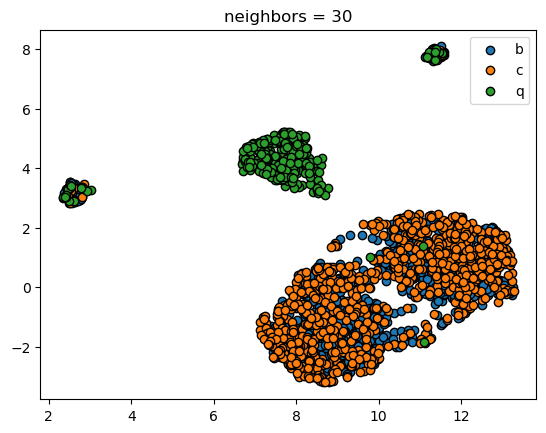

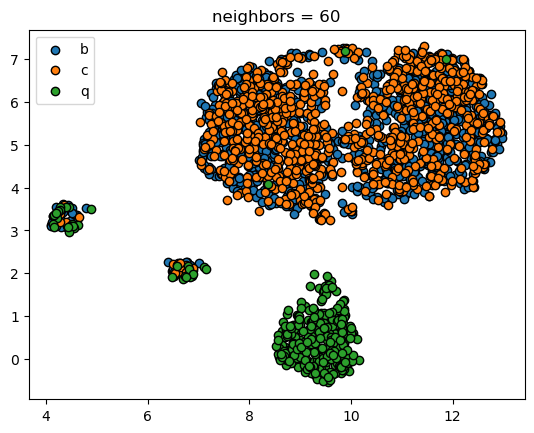

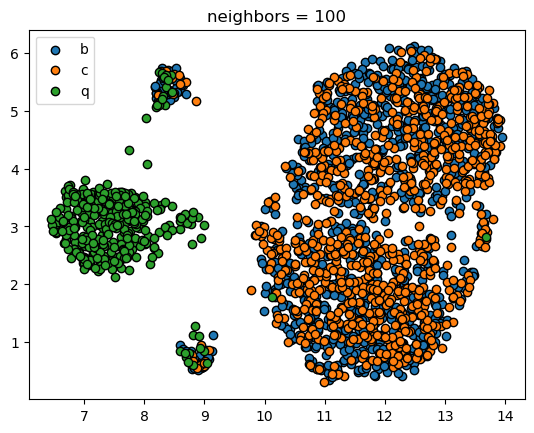

In [14]:
for n_neighbors in (2, 4, 8, 15, 30, 60, 100):
    # TODO: repeat the above, varying the n_neighbors parameter of UMAP
    reducer = umap.UMAP(n_neighbors=n_neighbors)
    embedding = reducer.fit_transform(features.T)
    for i in range(len(label_names)):
        indices = np.where(labels == i)
        plt.scatter(embedding[indices,0],embedding[indices,1],label=label_names[i],edgecolors='k')
        plt.title(f"neighbors = {n_neighbors}")
    plt.legend()
    plt.show()
    

In [15]:
def G_normalize(distr):
    mean = np.mean(distr)
    std = np.std(distr)

    return (distr-mean)/std

In [16]:
p = 100## features
N = 1000## measurements assume N>=p
n_com = 10
random_matrix = np.random.randn(p, N)
print(np.mean(random_matrix))
print(np.std(random_matrix))
#print(random_matrix)

Z = G_normalize(random_matrix)

print(np.mean(Z))
print(np.std(Z))


comp, proj, pc = pca(Z,n_components=n_com,pc=True)

print(pc)

random_matrix = np.random.randn(p, N)
Z = G_normalize(random_matrix)

comp, proj, pc = pca(Z,n_components=n_com,pc=True)
print(pc)

0.0010626882658975676
0.9990195054496385
-2.3447910280083306e-18
0.9999999999999999
[1700.77301391 1649.49384643 1610.34303424 1604.8672043  1559.06643302
 1547.03798727 1537.84003362 1520.46374184 1482.73848706 1473.33250107]
[1748.74939281 1681.05199463 1641.38244774 1616.26989558 1585.27331406
 1578.05365551 1543.22087548 1513.29021941 1494.83431026 1483.55082176]
